<a href="https://colab.research.google.com/github/Sinan-codes/bio-vs-nonbio/blob/main/22F23304_AIDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/AIDL_22f23304/train/'  # Train dataset directory
test_dir = '/content/drive/MyDrive/AIDL_22f23304/test/'    # Test dataset directory

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
from pathlib import Path

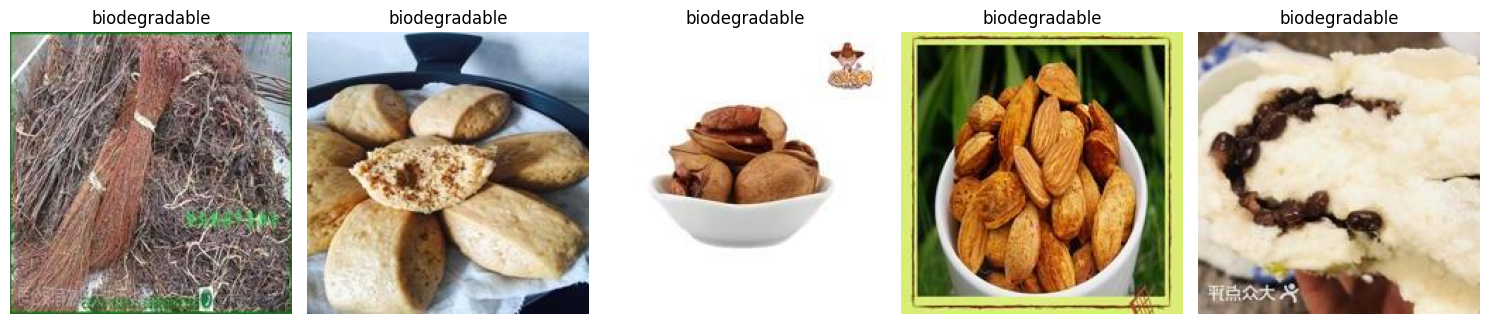

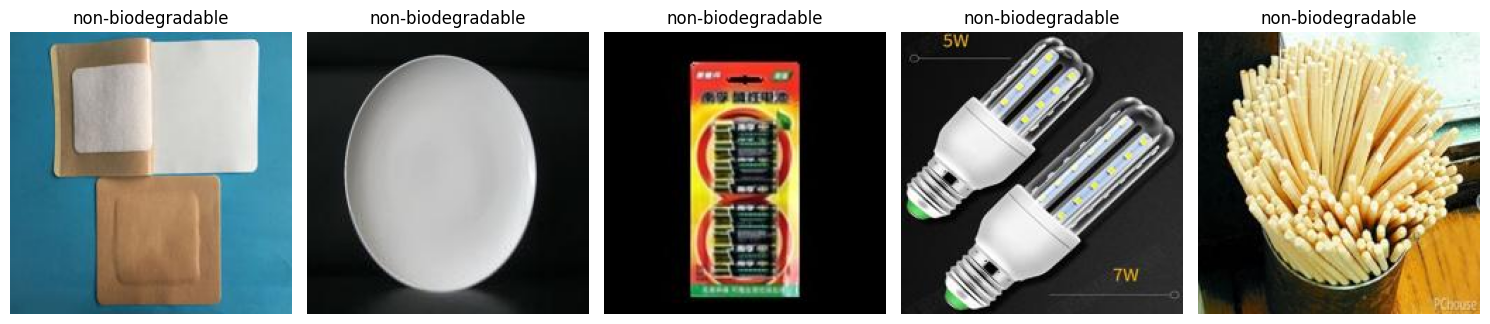

In [45]:
# function showing random images from biodegradable and non-biodegradable datasets
def show_random_images(class_name, num_images=5, subset="train"):
    folder = f'/content/drive/MyDrive/AIDL_22f23304/test/{class_name}'
    images = os.listdir(folder)
    selected = random.sample(images, num_images)

    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(selected):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(class_name)
    plt.tight_layout()
    plt.show()

# Invoke function to show random images from the different classes of datasets.
show_random_images("biodegradable")
show_random_images("non-biodegradable")

In [42]:
# Print number of images in train and test datasets
print(len(os.listdir('/content/drive/MyDrive/AIDL_22f23304/train/biodegradable')))
print(len(os.listdir('/content/drive/MyDrive/AIDL_22f23304/train/non-biodegradable')))
print(len(os.listdir('/content/drive/MyDrive/AIDL_22f23304/test/biodegradable')))
print(len(os.listdir('/content/drive/MyDrive/AIDL_22f23304/test/non-biodegradable')))

500
500
99
100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (biodegradable vs. non-biodegradable)
    subset='training',  # Specify 'training' for the training set
    classes=["biodegradable","non-biodegradable"]
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Specify 'validation' for the validation set
    classes=["biodegradable","non-biodegradable"]
)

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model - custom-made

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 177s 6s/step - accuracy: 0.6164 - loss: 1.1202 - val_accuracy: 0.8700 - val_loss: 0.2969
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 6s/step - accuracy: 0.9269 - loss: 0.2715 - val_accuracy: 0.9500 - val_loss: 0.1392
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.9269 - loss: 0.1966 - val_accuracy: 0.9600 - val_loss: 0.1141
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.9227 - loss: 0.1940 - val_accuracy: 0.9500 - val_loss: 0.1457
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 137s 5s/step - accuracy: 0.9501 - loss: 0.1398 - val_accuracy: 0.9500 - val_loss: 0.1431
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.9673 - loss: 0.0934 - val_accuracy: 0.9500 - val_loss: 0.1553
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step - accuracy: 0.9636 - loss: 0.0862 - val_accuracy: 0.9650 - val_loss: 0.1129
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 139s 6s/step - accuracy: 0.9785 - loss: 0.0535 - val_accuracy: 0.9550 - v

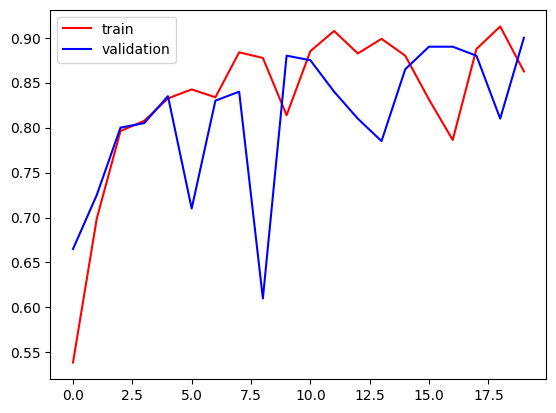

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy over epochs to visualize model performance
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

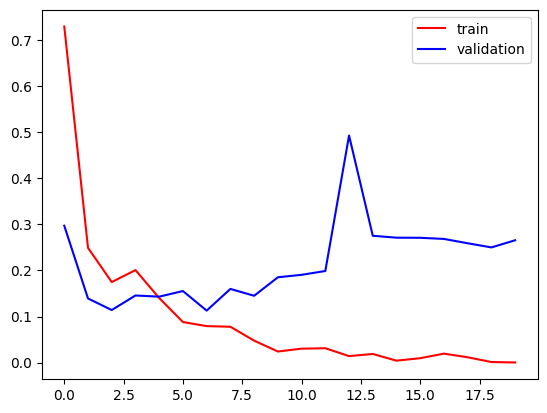

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Prepare test data generator with rescaling and binary class mode
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 199 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[47 52]
 [43 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.47      0.50        99
           1       0.52      0.57      0.55       100

    accuracy                           0.52       199
   macro avg       0.52      0.52      0.52       199
weighted avg       0.52      0.52      0.52       199



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 282s 11s/step - accuracy: 0.5024 - loss: 3.9326 - val_accuracy: 0.6650 - val_loss: 0.6599
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 313s 11s/step - accuracy: 0.6533 - loss: 0.7197 - val_accuracy: 0.7250 - val_loss: 0.5100
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 299s 12s/step - accuracy: 0.7653 - loss: 0.4915 - val_accuracy: 0.8000 - val_loss: 0.4666
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 261s 11s/step - accuracy: 0.8006 - loss: 0.4198 - val_accuracy: 0.8050 - val_loss: 0.4310
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 265s 11s/step - accuracy: 0.8435 - loss: 0.3847 - val_accuracy: 0.8350 - val_loss: 0.4354
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 258s 10s/step - accuracy: 0.8290 - loss: 0.3845 - val_accuracy: 0.7100 - val_loss: 0.5491
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 267s 11s/step - accuracy: 0.7897 - loss: 0.3953 - val_accuracy: 0.8300 - val_loss: 0.3852
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 311s 10s/step - accuracy: 0.8935 - loss: 0.3106 - val_accuracy: 0.

In [ ]:
predictions = resnet_model.predict(test_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 58s 8s/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 2 97]
 [ 3 97]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.40      0.02      0.04        99
           1       0.50      0.97      0.66       100

    accuracy                           0.50       199
   macro avg       0.45      0.50      0.35       199
weighted avg       0.45      0.50      0.35       199

